# Import libraries

In [35]:
from semseg_functions import load_imgs_labels,train_model,make_predictions
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import spearmanr

# Load Data

In [18]:
X_train,Y_train,X_val,Y_val=load_imgs_labels()

# Train model

In [3]:
model=train_model(X_train,Y_train,X_val,Y_val)

Training: Epoch 1, Batch 0, Loss: 1.324
Training: Epoch 1, Batch 1, Loss: 1.05
Training: Epoch 1, Batch 2, Loss: 0.888
Training: Epoch 1, Batch 3, Loss: 0.687
Training: Epoch 1, Batch 4, Loss: 0.628
Training: Epoch 1, Batch 5, Loss: 0.605
Training: Epoch 1, Batch 6, Loss: 0.527
Training: Epoch 1, Batch 7, Loss: 0.454
Training: Epoch 1, Batch 8, Loss: 0.484
Training: Epoch 1, Batch 9, Loss: 0.659
Training: Epoch 1, Batch 10, Loss: 0.467
Training: Epoch 1, Batch 11, Loss: 0.455
Training: Epoch 1, Batch 12, Loss: 0.464
Val: Epoch 1, Loss: 38.836
Training: Epoch 2, Batch 0, Loss: 0.422
Training: Epoch 2, Batch 1, Loss: 0.406
Training: Epoch 2, Batch 2, Loss: 0.384
Training: Epoch 2, Batch 3, Loss: 0.319
Training: Epoch 2, Batch 4, Loss: 0.408
Training: Epoch 2, Batch 5, Loss: 0.385
Training: Epoch 2, Batch 6, Loss: 0.455
Training: Epoch 2, Batch 7, Loss: 0.43
Training: Epoch 2, Batch 8, Loss: 0.388
Training: Epoch 2, Batch 9, Loss: 0.416
Training: Epoch 2, Batch 10, Loss: 0.429
Training: E

# Predict on held out text

In [19]:
y_val_pred=make_predictions(X_val,model=None)

In [20]:
y_val_pred_lbls=y_val_pred.argmax(1)

# Report segmentation model performance

In [12]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(Y_val.numpy().flatten(),y_val_pred_lbls.flatten()))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96   2366073
           1       0.96      0.73      0.83   3000674
           2       0.64      0.95      0.77   1186853

    accuracy                           0.86   6553600
   macro avg       0.84      0.89      0.85   6553600
weighted avg       0.89      0.86      0.86   6553600



# Compre true and predicted NC ratios

In [25]:
nucleus_pred=(y_val_pred_lbls.reshape(y_val_pred_lbls.shape[0],-1)==1).sum(axis=1)
cytoplasm_pred=(y_val_pred_lbls.reshape(y_val_pred_lbls.shape[0],-1)==2).sum(axis=1)
nc_ratio_pred=nucleus_pred/(nucleus_pred+cytoplasm_pred)

In [26]:
nucleus_true=(Y_val.reshape(Y_val.shape[0],-1)==1).sum(axis=1)
cytoplasm_true=(Y_val.reshape(Y_val.shape[0],-1)==2).sum(axis=1)
nc_ratio_true=nucleus_true/(nucleus_true+cytoplasm_true)

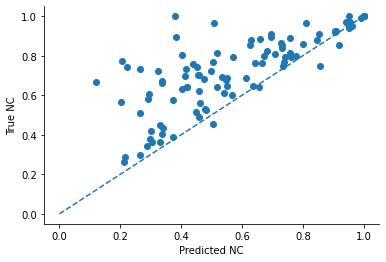

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(nc_ratio_pred,nc_ratio_true)
plt.plot([0,1],[0,1],ls="--")
plt.xlabel("Predicted NC")
plt.ylabel("True NC")
sns.despine()

(-0.5, 255.5, 255.5, -0.5)

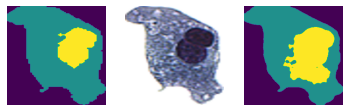

In [23]:
idx=6
plt.subplot(131)
plt.imshow(Y_val[idx])
plt.axis("off")
plt.subplot(132)
plt.imshow((X_val[idx]*255).permute((1,2,0)).numpy().astype(int))
plt.axis("off")
plt.subplot(133)
plt.imshow(y_val_pred_lbls[idx])
plt.axis("off")

In [33]:
# correlation - true vs predicted
spearmanr(nc_ratio_pred,nc_ratio_true)

SpearmanrResult(correlation=0.7792938120009845, pvalue=1.317647913103015e-21)

In [38]:
# error - true vs predicted
np.abs(nc_ratio_pred-nc_ratio_true.numpy()).mean()

0.1538270477828651